# Data Exploration & Pre Processing

In this notebook describe this step by step process of data collection and formulation to identify-how much of theR&D Expenditure is related to the increase in Employees from Abroad in Netherlands.

# Setup
Install Dependencies

In [1]:
%pip install pandas
%pip install plotly
%pip install SQLAlchemy==1.4.46
%pip install nbformat
%pip install matplotlib
%pip install cbsodata
%pip install time

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement time (from versions: none)
ERROR: No matching distribution found for time


# Import Packages

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlite3
import cbsodata
import time

# Datasource1: Employees from abroad in Netherlands

•	Provided by: European Data Portal

•	Metadata URL: https://data.europa.eu/data/datasets/4308-employees-from-abroad-resident-non-resident-demographic-variables?locale=en

•	Download URL: [https://opendata.cbs.nl/statline/#/CBS/en/dataset/84060ENG/table?dl=99499]
•	(https://opendata.cbs.nl/statline/#/CBS/en/dataset/84060ENG/table?dl=99499)

•	Data Format: CSV Employees from abroad;resident/non-resident,demographic variables,2010-2017

# Function to fetch data with retries

In [3]:
def fetch_data_with_retry(table, filters, max_attempts=5):
    attempts = 0
    while attempts < max_attempts:
        try:
            # Downloading entire dataset (can take up to 30s)
            data = pd.DataFrame(cbsodata.get_data(table, filters=filters))
            return data
        except Exception as e:
            attempts += 1
            print(f"Attempt {attempts} failed. Error: {e}")
            time.sleep(1)  # Wait for 1 second before the next attempt
    return pd.DataFrame()  # Return an empty DataFrame if max attempts are reached

# Load the Dataset 1

In [4]:
# Read data of Research and development by company sizes in netherlands from online source:
# Define filter conditions
filter_condition = (
    "EmployeeWithWithoutRegistration eq 'T001391' and "
    "EmployeeCharacteristics eq 'T001097' and "
    "SectorBranchesSIC2008 eq 'T001081' and "
    "JobCharacteristics eq 'T001025' and "
    "MigrationBackgroundNationality eq 'T001040' and "
    "(Periods eq '2013JJ00' or Periods eq '2014JJ00' or Periods eq '2015JJ00' or Periods eq '2016JJ00' or "
    "Periods eq '2017JJ00')"
)

# Fetch data with retry mechanism
df1 = fetch_data_with_retry('84060ENG', filters=filter_condition)

In [5]:
print(df1.columns)

Index(['ID', 'EmployeeWithWithoutRegistration', 'EmployeeCharacteristics',
       'SectorBranchesSIC2008', 'JobCharacteristics',
       'MigrationBackgroundNationality', 'Periods',
       'JobsEmployeesFromAbroad_1'],
      dtype='object')


# Look at the first rows- Data source 1

In [6]:
df1.head()

,ID,EmployeeWithWithoutRegistration,EmployeeCharacteristics,SectorBranchesSIC2008,JobCharacteristics,MigrationBackgroundNationality,Periods,JobsEmployeesFromAbroad_1
0,19,Total jobs,Total employees,A-U All economic activities,Total,Total,2013,697.7
1,24,Total jobs,Total employees,A-U All economic activities,Total,Total,2014,702.8
2,29,Total jobs,Total employees,A-U All economic activities,Total,Total,2015,732.1
3,34,Total jobs,Total employees,A-U All economic activities,Total,Total,2016,769.7
4,39,Total jobs,Total employees,A-U All economic activities,Total,Total,2017,838.1


# Know the columns of data

In [7]:
i=1
for col in df1.columns:
    print(i,": ",col,"\n")
    i+=1

1 :  ID 

2 :  EmployeeWithWithoutRegistration 

3 :  EmployeeCharacteristics 

4 :  SectorBranchesSIC2008 

5 :  JobCharacteristics 

6 :  MigrationBackgroundNationality 

7 :  Periods 

8 :  JobsEmployeesFromAbroad_1 



# Clean and preprocess the data

In [8]:
df1 = df1.drop(columns=['ID', 'SectorBranchesSIC2008', 'JobCharacteristics', 'EmployeeWithWithoutRegistration',
                            'MigrationBackgroundNationality', 'EmployeeCharacteristics'])

In [9]:
df1

,Periods,JobsEmployeesFromAbroad_1
0,2013,697.7
1,2014,702.8
2,2015,732.1
3,2016,769.7
4,2017,838.1


In [10]:
df1.columns = ['Year', 'Number of employees from abroad']
df1.index.name = 'ID'

In [12]:
# Number of employees from abroad are given in divisible by 1000 so it means 689 means 689000 So modifying the actual values
df1['Number of employees from abroad'] = df1['Number of employees from abroad'] * 1000

In [13]:
df1

,Year,Number of employees from abroad
ID,,
0,2013,697700.0
1,2014,702800.0
2,2015,732100.0
3,2016,769700.0
4,2017,838100.0


# Visualize the Data

# Line Plot:

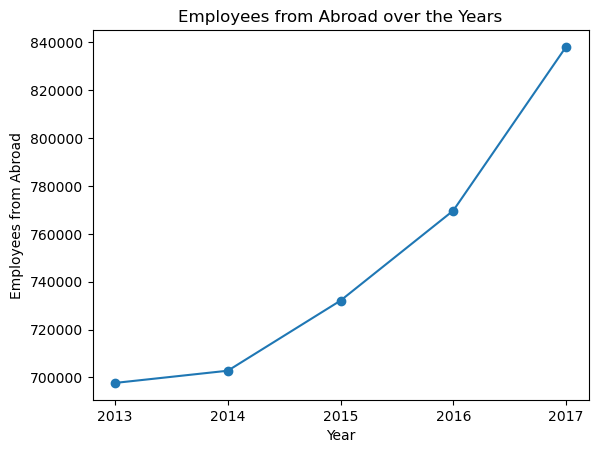

In [15]:
x = df1['Year']
y = df1['Number of employees from abroad']

# Creating a line graph
plt.plot(x, y, marker='o')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Employees from Abroad')
plt.title('Employees from Abroad over the Years')

# Displaying the graph
plt.show()

# Bar Plot:

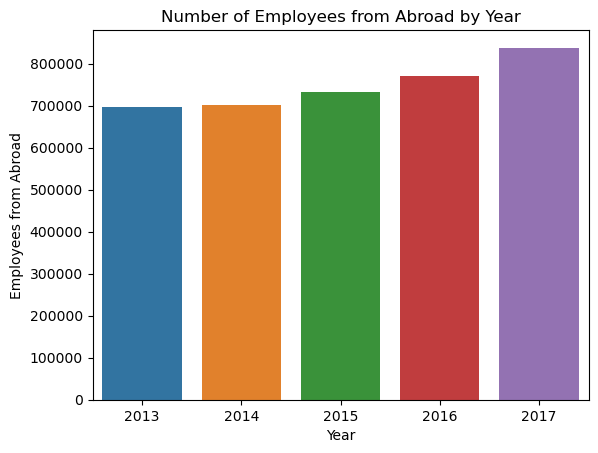

In [16]:
sns.barplot(data=df1, x='Year', y='Number of employees from abroad')
plt.xlabel('Year')
plt.ylabel('Employees from Abroad')
plt.title('Number of Employees from Abroad by Year')
plt.show()

# Load the Dataset 2

In [17]:
# Read data of Research and development by company sizes in netherlands from online source:
# Define filter conditions
filter_condition = (
    "SectorBranchesSIC2008 eq 'T001081' and "
    "CompanySize eq 'T001098' and "
    "(Periods eq '2013JJ00' or Periods eq '2014JJ00' or Periods eq '2015JJ00' or Periods eq '2016JJ00' or "
    "Periods eq '2017JJ00')"
)

# Fetch R&D Expenditure data with retry mechanism
df2 = fetch_data_with_retry('84985ENG', filters=filter_condition)

# Look at the first rows- Data source 2

In [18]:
df2.head()

,ID,CompanySize,SectorBranchesSIC2008,Periods,EmployedPersons_1,YearsOfWork_2,ExpenditureRDOnInHouseActivities_3,EnterprisesWithInHouseRDActivities_4
0,0,Total,A-U All economic activities,2013,146165,95108,9299,19690
1,1,Total,A-U All economic activities,2014,144689,94612,9444,19875
2,2,Total,A-U All economic activities,2015,151385,97443,9515,19800
3,3,Total,A-U All economic activities,2016,157018,102614,10008,20160
4,4,Total,A-U All economic activities,2017,157844,107496,10667,19485


In [19]:
df2 = df2.drop(
        columns=['ID', 'SectorBranchesSIC2008', 'YearsOfWork_2', 'EnterprisesWithInHouseRDActivities_4', 'CompanySize'])

In [20]:
df2

,Periods,EmployedPersons_1,ExpenditureRDOnInHouseActivities_3
0,2013,146165,9299
1,2014,144689,9444
2,2015,151385,9515
3,2016,157018,10008
4,2017,157844,10667


In [21]:
df2.columns

Index(['Periods', 'EmployedPersons_1', 'ExpenditureRDOnInHouseActivities_3'], dtype='object')

In [22]:
# Adding column names
df2.columns = ['Year','Total R&D Employees','Total R&D Expenditure' ]
df2.index.name = 'ID'

In [23]:
# Amount spent as R&D expenditure is given in terms of Millions. so, it means 9299 means 9299000000 So modifying the actual values
df2['Total R&D Expenditure'] *= 1000000

In [24]:
df2

,Year,Total R&D Employees,Total R&D Expenditure
ID,,,
0,2013,146165,9299000000
1,2014,144689,9444000000
2,2015,151385,9515000000
3,2016,157018,10008000000
4,2017,157844,10667000000


# Visualize the Data

# Line Plot:

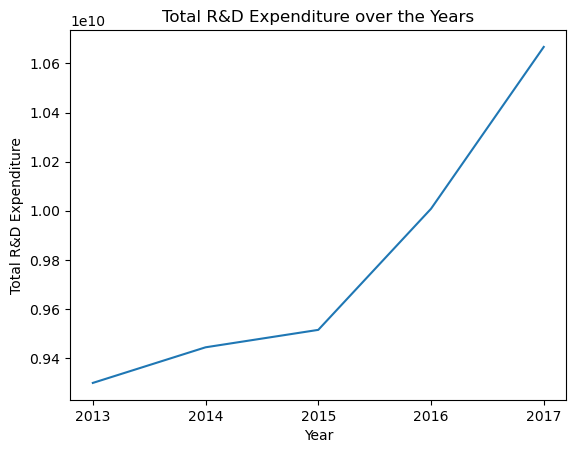

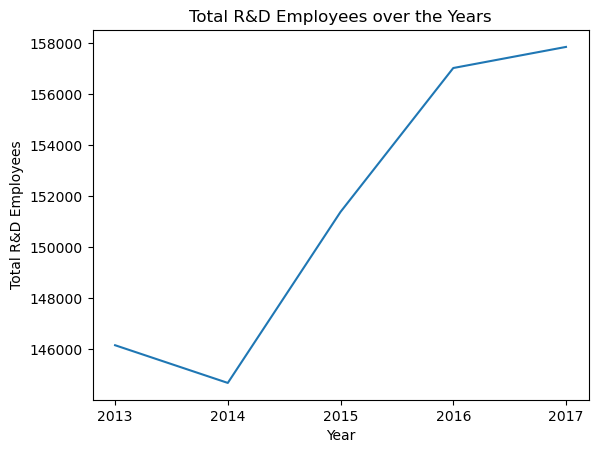

In [25]:
# Line plot for Total Expenditure
plt.plot(df2['Year'], df2['Total R&D Expenditure'])
plt.xlabel('Year')
plt.ylabel('Total R&D Expenditure')
plt.title('Total R&D Expenditure over the Years')
plt.show()

# Line plot for Total Employees
plt.plot(df2['Year'], df2['Total R&D Employees'])
plt.xlabel('Year')
plt.ylabel('Total R&D Employees')
plt.title('Total R&D Employees over the Years')
plt.show()

# Bar Plot:

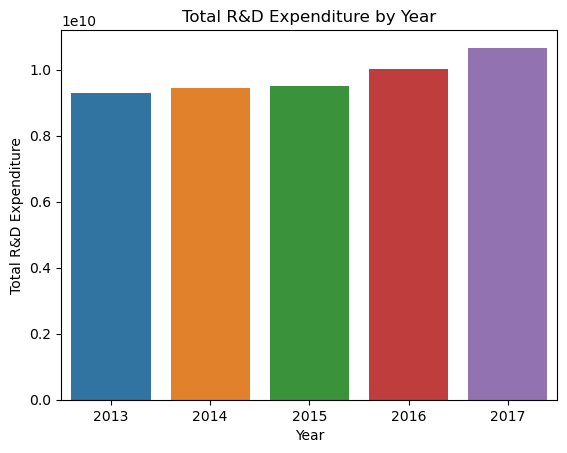

In [27]:
sns.barplot(data=df2, x='Year', y='Total R&D Expenditure')
plt.xlabel('Year')
plt.ylabel('Total R&D Expenditure')
plt.title('Total R&D Expenditure by Year')
plt.show()

# Scatter Plot:

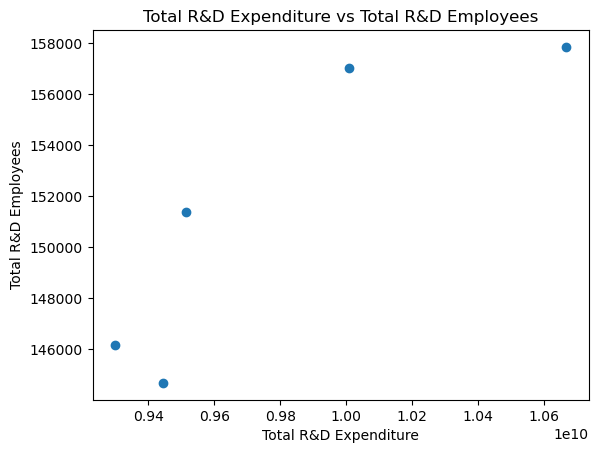

In [28]:
# Scatter plot for Total Expenditure vs Total Employees
plt.scatter(df2['Total R&D Expenditure'], df2['Total R&D Employees'])
plt.xlabel('Total R&D Expenditure')
plt.ylabel('Total R&D Employees')
plt.title('Total R&D Expenditure vs Total R&D Employees')
plt.show()

# Area Plot:

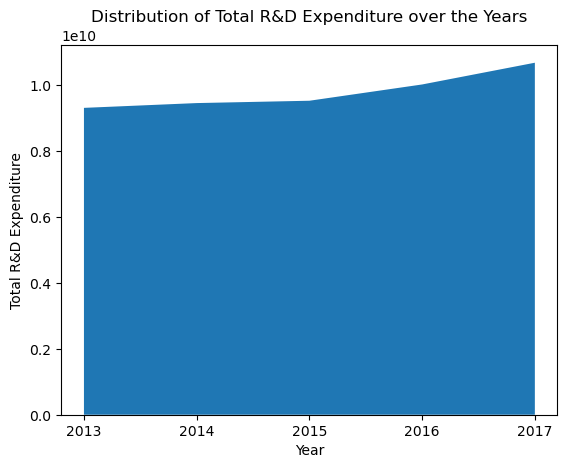

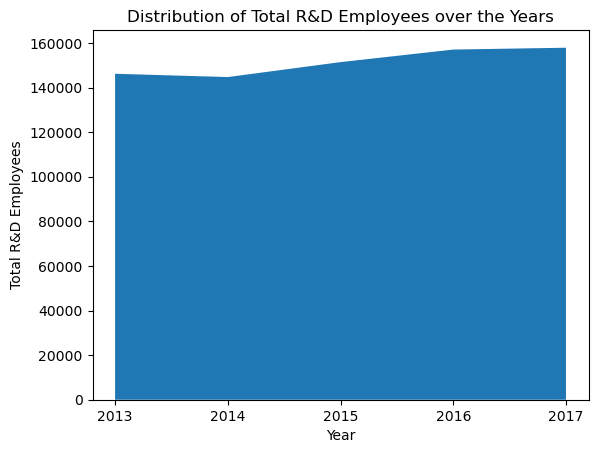

In [29]:
# Area plot for Total Expenditure
plt.stackplot(df2['Year'], df2['Total R&D Expenditure'])
plt.xlabel('Year')
plt.ylabel('Total R&D Expenditure')
plt.title('Distribution of Total R&D Expenditure over the Years')
plt.show()

# Area plot for Total Employees
plt.stackplot(df2['Year'], df2['Total R&D Employees'])
plt.xlabel('Year')
plt.ylabel('Total R&D Employees')
plt.title('Distribution of Total R&D Employees over the Years')
plt.show()

# Box Plot:

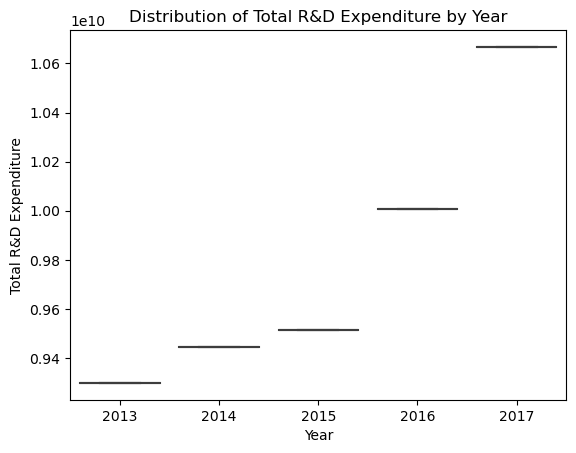

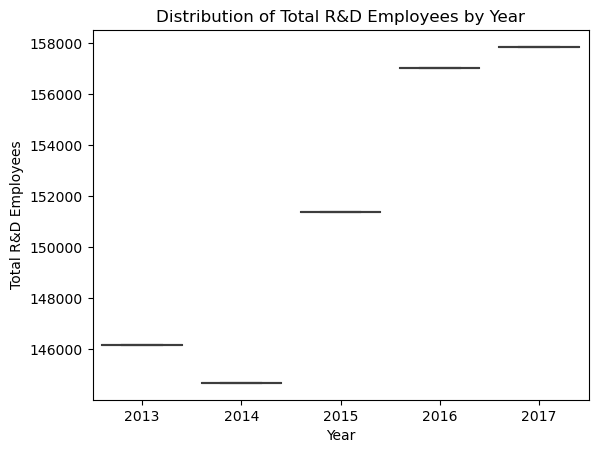

In [30]:

# Box plot for Total Expenditure
sns.boxplot(x=df2['Year'], y=df2['Total R&D Expenditure'])
plt.xlabel('Year')
plt.ylabel('Total R&D Expenditure')
plt.title('Distribution of Total R&D Expenditure by Year')
plt.show()

# Box plot for Total Employees
sns.boxplot(x=df2['Year'], y=df2['Total R&D Employees'])
plt.xlabel('Year')
plt.ylabel('Total R&D Employees')
plt.title('Distribution of Total R&D Employees by Year')
plt.show()

# Correlation Heatmap:

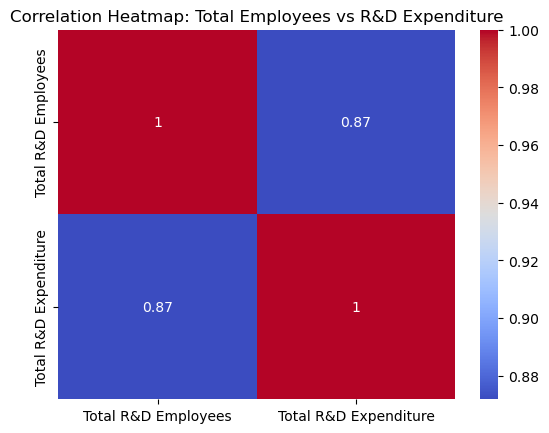

In [31]:
# Calculate the correlation matrix
correlation_matrix = df2[['Total R&D Employees', 'Total R&D Expenditure']].corr()

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Set the title of the plot
plt.title('Correlation Heatmap: Total Employees vs R&D Expenditure')

# Display the plot
plt.show()

In [32]:
# Convert columns to numeric type
# Convert columns to numeric type
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)
df1['Number of employees from abroad'] = pd.to_numeric(df1['Number of employees from abroad'], errors='coerce')
df2['Total R&D Expenditure'] = pd.to_numeric(df2['Total R&D Expenditure'], errors='coerce')

print(df1['Number of employees from abroad'], df2['Total R&D Expenditure'])
# Calculate correlation between the columns
correlation = df1['Number of employees from abroad'].corr(df2['Total R&D Expenditure'])

print(f"Correlation between 'Number of employees from abroad' and 'Total R&D Expenditure': {correlation}")

0    697700.0
1    702800.0
2    732100.0
3    769700.0
4    838100.0
Name: Number of employees from abroad, dtype: float64 0     9299000000
1     9444000000
2     9515000000
3    10008000000
4    10667000000
Name: Total R&D Expenditure, dtype: int64
Correlation between 'Number of employees from abroad' and 'Total R&D Expenditure': 0.9908151546317109


In [35]:
df1_from_2013_to_2017= df1
df1_from_2013_to_2017                                         

,Year,Number of employees from abroad
0,2013,697700.0
1,2014,702800.0
2,2015,732100.0
3,2016,769700.0
4,2017,838100.0


In [36]:
df2_from_2013_to_2017= df2
df2_from_2013_to_2017                                         

,Year,Total R&D Employees,Total R&D Expenditure
0,2013,146165,9299000000
1,2014,144689,9444000000
2,2015,151385,9515000000
3,2016,157018,10008000000
4,2017,157844,10667000000


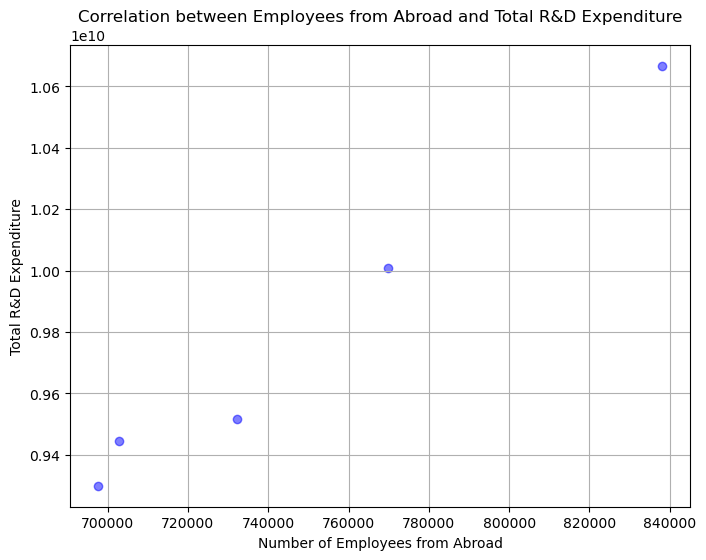

In [37]:
import matplotlib.pyplot as plt

# Assuming the previous code for data manipulation and correlation calculation is already executed
# Plotting the correlation using a scatter plot  df['Year'] >= 2013) & (df['Year'] <= 2017
plt.figure(figsize=(8, 6))
plt.scatter(df1_from_2013_to_2017['Number of employees from abroad'], df2_from_2013_to_2017['Total R&D Expenditure'], color='blue', alpha=0.5)
plt.title('Correlation between Employees from Abroad and Total R&D Expenditure')
plt.xlabel('Number of Employees from Abroad')
plt.ylabel('Total R&D Expenditure')
plt.grid(True)
plt.show()

In [38]:
merged_df = pd.merge(df1_from_2013_to_2017, df2_from_2013_to_2017, on='Year')

C:\Users\urrehman\AppData\Local\Temp\ipykernel_19140\714940133.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')


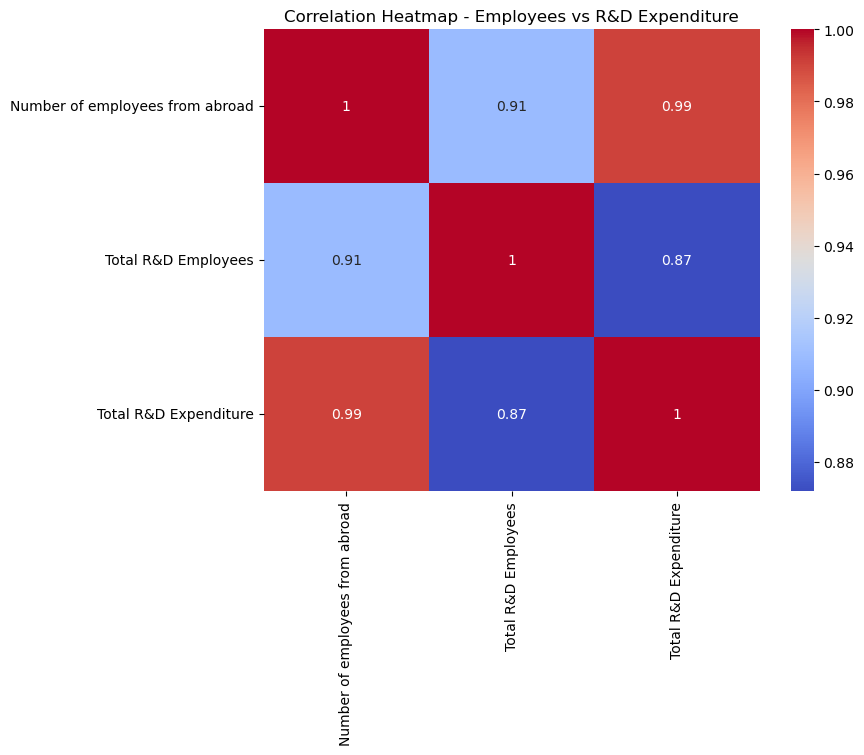

In [40]:
correlation = merged_df['Number of employees from abroad'].corr(merged_df['Total R&D Expenditure'])

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Employees vs R&D Expenditure')
plt.show()

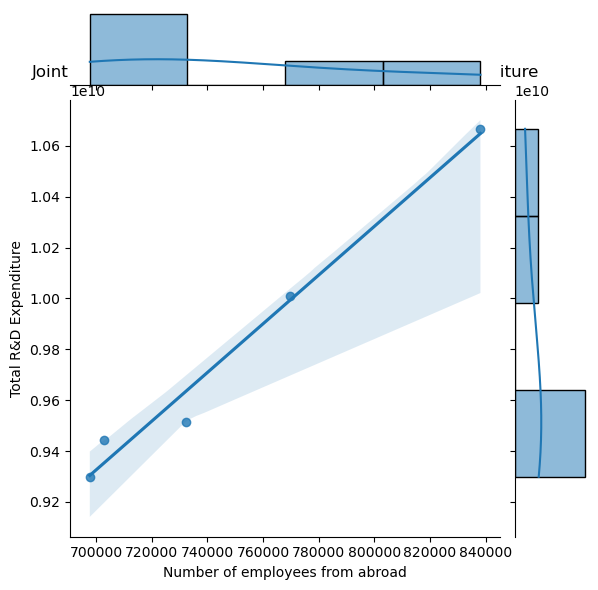

In [41]:
# Joint plot
sns.jointplot(x='Number of employees from abroad', y='Total R&D Expenditure', data=merged_df, kind='reg')
plt.title('Joint Plot - Employees from Abroad vs Total R&D Expenditure')
plt.show()

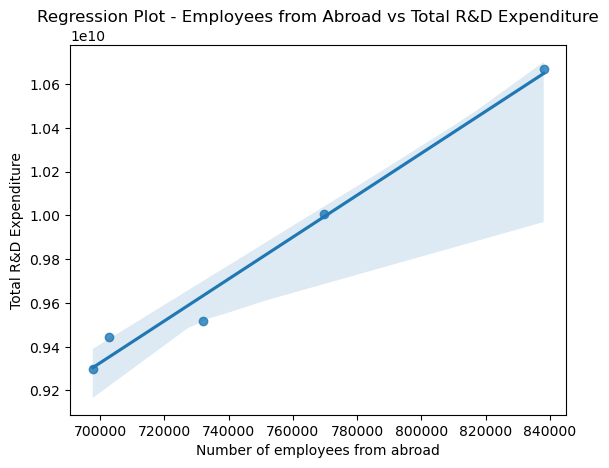

Correlation coefficient: 0.9908151546317109


In [42]:
# Regression plot
sns.regplot(x='Number of employees from abroad', y='Total R&D Expenditure', data=merged_df)
plt.title('Regression Plot - Employees from Abroad vs Total R&D Expenditure')
plt.show()

print(f"Correlation coefficient: {correlation}")

# Pair Plot: 
A pair plot is useful when you want to visualize the relationships between multiple variables. It creates scatter plots for each pair of variables in DataFrame

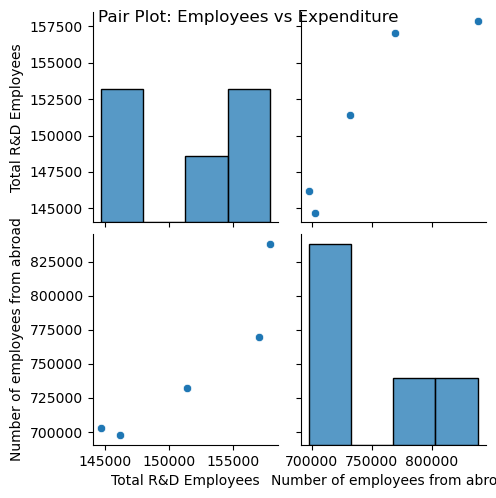

In [43]:
sns.pairplot(data=merged_df[['Total R&D Employees', 'Number of employees from abroad']])
plt.suptitle('Pair Plot: Employees vs Expenditure')
plt.show()

In [48]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Assuming df1 and df2 are your provided DataFrames
# Combine the two DataFrames
df_merged = pd.merge(df1_from_2013_to_2017, df2_from_2013_to_2017, on='Year')

# Extracting features and target variable
X = df_merged[['Total R&D Expenditure']]
y = df_merged['Number of employees from abroad']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predicting 'employees from abroad' based on 'Total R&D Expenditure'
y_pred = model.predict(X_test)

# Predicting 'Total R&D Expenditure' for a given number of new employees from abroad
# For example, predicting the R&D Expenditure for 750,000 new employees from abroad
new_employees_abroad = 100000
predicted_expenditure = model.predict([[new_employees_abroad]])
print(f"Predicted R&D Expenditure for {new_employees_abroad} new employees from abroad: {predicted_expenditure[0]}")

# Evaluating model performance (Optional)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Predicted R&D Expenditure for 100000 new employees from abroad: -213873.0152004602
Mean Squared Error: 206778585.90250868
R-squared Score: nan


C:\Users\urrehman\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\urrehman\AppData\Local\anaconda3\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [46]:
# Assuming 'model' is the trained linear regression model

# Function to predict employees from abroad for a given R&D Expenditure
def predict_employees_from_expenditure(expenditure):
    # Reshape the input for prediction as the model expects a 2D array
    expenditure_input = [[expenditure]]
    
    # Predict the number of employees from abroad for the given expenditure
    employees_predicted = model.predict(expenditure_input)
    return employees_predicted[0]

# Example prediction for R&D Expenditure (change 'given_expenditure' to the desired value)
given_expenditure = 15000000000  # Example R&D Expenditure 1000000
predicted_employees = predict_employees_from_expenditure(given_expenditure)

print(f"For an R&D Expenditure of {given_expenditure}, the predicted number of employees from abroad is: {predicted_employees}")


For an R&D Expenditure of 15000000000, the predicted number of employees from abroad is: 1264933.3137861723


C:\Users\urrehman\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
